**Gerekli Kütüphanelerin Kurulumu Gerçekleşti.**

> **pydicom**--> dcm dosyalarıyla işlem yapabilmemizi sağlar.


> **os-sys** --> dosyalara, klasörlere ve içeriklerine erişmemizi sağlar.








In [ ]:
pip install pydicom

     |████████████████████████████████| 1.9MB 8.5MB/s 


In [ ]:
pip install os-sys

     |████████████████████████████████| 15.6MB 338kB/s 
     |████████████████████████████████| 10.2MB 33.3MB/s 
     |████████████████████████████████| 3.5MB 42.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 235kB 50.0MB/s 
ERROR: Could not find a version that satisfies the requirement text-editor (from os-sys) (from versions: none)
ERROR: No matching distribution found for text-editor (from os-sys)


Drive hesabını doğrulama ve drive'a yönlendirme yapıldı.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/My Drive")

csv dosyasındaki hasta bilgileri yazdırıldı.

In [ ]:
import pydicom
import numpy as np
import pandas as pd
import os
data_dir = './proje/stage1/' #dosya yolunu belirttim
patients = os.listdir(data_dir)
print(len(patients))
labels=pd.read_csv('./proje/stage1/stage1_labels.csv', index_col=0) #excel dosyasını okuyoruz
labels.head() #excel dosyasının ilk 5 kaydını yazdırdım

1


,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


Röntgen görüntüleri listdir metoduyla listelendi ve değişkene atıldı.

In [ ]:
path = './proje/sample_images/'
patients = os.listdir(path) #  listdir kullnarak  dcm dosyalar listelendi
patients.sort() #dosyalar içinde sıralama yapıldı
print(patients[0])
print(len(patients))

03ff23e445787886f8b0cb192b3c154d
57


Diziye dcm görüntüleri sırasıyla eklendi.

In [ ]:
lstFilesDCM = []  #boş bir liste oluşturuldu
say=0
for patient in patients:
#     label = labels_df.get_value(patient, 'cancer')
    for dirName, subdirList, fileList in os.walk(path + '/' + patient):
        for filename in fileList:
            if ".dcm" in filename.lower():  # dcm uzantılı olup olmadığı kontrol ettik
                lstFilesDCM.append(os.path.join(dirName,filename)) #dosya yoluyla dosyayı listeye ekliyor
                
                if (len(lstFilesDCM)) ==3500:
                  break
                #print(len(lstFilesDCM))
print("aşama tamamlandı")  
print(len(lstFilesDCM))

aşama tamamlandı
3500


Boyut ayarlama resimleri yükleme  tip dönüşümü işlemleri yapıldı.

In [ ]:
import matplotlib.pyplot as plt
import pydicom as dicom

def load_images(file_path):
    
    slices = [dicom.read_file(s) for s in file_path] #dosyaları for döngüsüyle tek tek okuduk 
    slices.sort(key = lambda x: int(x.InstanceNumber)) # sort fonksiyonu sıralama yapar--
   #Lambda fonksiyonlarını, bir fonksiyonun işlevselliğine ihtiyaç duyduğumuz, ama konum olarak bir fonksiyon tanımlayamayacağımız veya fonksiyon tanımlamanın zor ya da meşakkatli olduğu durumlarda kullanabiliriz.
   
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2]) #gelen dcm resminin x,y,z koordinatlarında ayarlama yapıldı çıkan sonucun negatif olmasını engellemek için mutlak değeri alındı.
        
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation) # hata çıkarsa tek boyutlu çalışıyoruz görüntü düzleminden işleme alıyoruz
        

    for s in slices:
        s.SliceThickness = slice_thickness 
        #dcm dosyasının dilim kalınlığı atandı
    return slices #dcm dosylarını geri döndürüyoruz
    #print("işlem tamamlandı")

print("resimler dönüstürülmeye baslanıyor")
ornekdata=load_images(lstFilesDCM) #fonksiyona dcm dosyalarını yollandı
print("resimler dönüştürüldü")

resimler dönüstürülmeye baslanıyor
resimler dönüştürüldü


In [ ]:
with open("Sample_metadata.txt", 'w') as file_handler: #sample_metdata adında bir txte dosyasını açtık
    for item in ornekdata: #ornekdataların içindeki bilgileri txt dosyasına yazdık 
        file_handler.write("{}\n".format(item))
#dataların içideki bilgiler txt dosyasına yazdırıldı

In [ ]:
def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans]) #pixel_array dosyadak pixelleri okuyor ve stack fonksiyonu pixelleri birleştiriyor
  
    image = image.astype(np.int16) # resim tipini hata çıkmaması ve uyumlu olması için dönüştürdük.

    image[image == -2000] = 0
   
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)    
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

imgs = get_pixels_hu(ornekdata)# fonksiyona dcm dosyalarını yolladık 


In [ ]:
output_path = "./Output"
if not os.path.exists(output_path):
    os.makedirs(output_path)
np.save(output_path + "fullimages.npy", imgs)

Dcm dosyalarını görüntülemek için işlemler yapıldı.


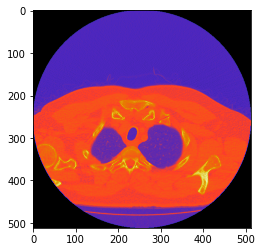

In [ ]:
plt.imshow(imgs[500], cmap='CMRmap') #matplotlible herhangi bir x-ray görüntüsünü görüntüledik.
plt.show()

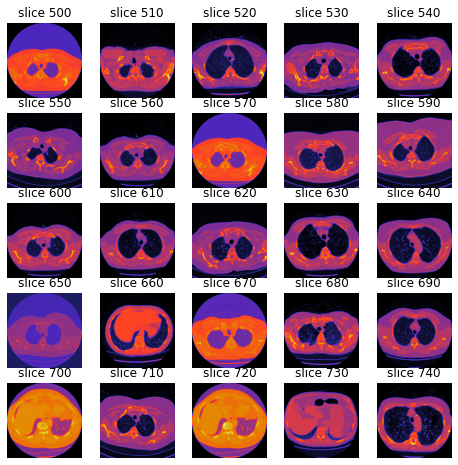

In [ ]:
def sample_stack(stack, rows=5, cols=5, start_with=500, show_every=10):
    fig,ax = plt.subplots(rows,cols,figsize=[8,8]) #subplots metodu ax değişkenine nesneleri doldurma görevinde kullanıldı nesne olarak döndürdü
    for i in range(rows*cols): 
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='CMRmap')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()
    
    
imgs_to_process = np.load(output_path + 'fullimages.npy')
sample_stack(imgs_to_process) # fonksiyona yollama yapıyoruz

Tekrar görtüler alınıp boyutları ve özellikleri değiştirildi.

In [ ]:
import numpy as np
import pandas as pd
import pydicom
import os
import matplotlib.pyplot as plt
import cv2
import math
##Setting x*y size to 50
size = 50

## Setting z-dimension (number of slices to 20)
NoSlices = 10


def chunks(l, n):

    count = 0
    for i in range(0, len(l), n):
        if (count < NoSlices):
            yield l[i:i + n]
            count = count + 1


def ortalama(l):
    return sum(l) / len(l)

def dataProcessing(patient, labels_df, size=150, noslices=20, visualize=False):
    print("fonksiyona girdi")
    label = labels_df._get_value(patient, 'cancer')
    path = './proje/sample_images/' + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))

    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array), (size, size)) for each_slice in slices]

    chunk_sizes = math.floor(len(slices) / noslices)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(ortalama, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    if len(new_slices) == noslices-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == noslices-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == noslices+2:
        new_val = list(map(mean, zip(*[new_slices[noslices-1],new_slices[noslices],])))
        del new_slices[noslices]
        new_slices[noslices-1] = new_val
        
    if len(new_slices) == noslices+1:
        new_val = list(map(mean, zip(*[new_slices[noslices-1],new_slices[noslices],])))
        del new_slices[no_slices]
        new_slices[noslices-1] = new_val

    if visualize:
        fig = plt.figure()
        for num,each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice, cmap='gray')
        plt.show()


    if label == 1:
        label = np.array([0, 1])
    elif label == 0:
        label = np.array([1, 0])
    
    return np.array(new_slices), label


imageData = []
for num, patient in enumerate(patients):
    if num % 100 == 0:
        print('Saved -', num)
    try:
        img_data, label = dataProcessing(patient, labels, size=size, noslices=NoSlices)
        imageData.append([img_data, label,patient])
    except KeyError as e:
        print('data etiketsiz')
       

        
##sonuçlar numpy dosyasına kaydedildi
np.save('./Output/fullimages.npy'.format(size, size, NoSlices), imageData)

Saved - 0
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
data etiketsiz
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
data etiketsiz
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
data etiketsiz
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
data etiketsiz
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
data etiketsiz
fonksiyona girdi
fonksiyona girdi
fonksiyona girdi
fonksiyona gir

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
pip install tflearn

     |████████████████████████████████| 112kB 7.6MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp36-none-any.whl size=127301 sha256=b8b6708ea4fcf1abdaebf60858ab8d34efa609ac5a5a1df916e545043c528fe7
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


Gerekli kütüphaneler import edildi.

In [ ]:
import tensorflow as tf
import time
import pandas as pd
import tflearn
from tflearn.layers.conv import conv_3d, max_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import matplotlib.pyplot as plt


Train ve test dataları ayrıldı boyut ve her seferde kaç görüntünün döneceği ayarlandı.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:

imageData = np.load('./Output/fullimages.npy', allow_pickle=True)
trainingData = imageData[0:2000]
validationData = imageData[-500:]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x = tf.placeholder('float')
y = tf.placeholder('float')

size = 50
keep_rate = 0.8
NoSlices = 10


Ayrılan datalara derin öğrenme yöntemleri uygularak öğrenim gerçekleştirildi ve başarı ölçümü yapıldı.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch 1 completed out of 20 loss: 3757949906944.0
	Accuracy: 0.7058824
	Loss: 3757949906944.0
	Time to complete: 13.485002517700195 seconds.
Epoch 2 completed out of 20 loss: 1763358617600.0
	Accuracy: 0.7647059
	Loss: 1763358617600.0
	Time to complete: 26.21691870689392 seconds.
Epoch 3 completed out of 20 loss: 891391754240.0
	Accuracy: 0.4117647
	Loss: 891391754240.0
	Time to complete: 39.05752444267273 seconds.
Epoch 4 completed out of 20 loss: 2613017640960.0
	Accuracy: 0.627451
	Loss: 2613017640960.0
	Time to complete: 51.905187368392944 seconds.
Epoch 5 completed out of 20 loss: 1413398036480.0
	Accuracy: 0.8627451
	Loss: 1413398036480.0
	Time to complete: 64.83359837532043 seco

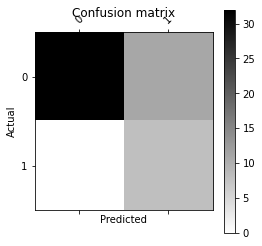

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    1
31    0
32    0
33    0
34    1
35    0
36    0
37    0
38    0
39    0
40    1
41    0
42    0
43    0
44    1
45    0
46    0
47    0
48    0
49    0
50    1
Name: Actual, dtype: int64 0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    0
27    1
28    0
29    0
30    1
31    1
32    0
33    0
34    1
35    1
36    0
37    1
38    0
39    0
40    1
41    1
42    0
43    0
44    1
45    0
46    0
47    0
48    0
49    1
50    1
Name: Predicted, dtype: int64
[[32 11]
 [ 0  8]]


In [ ]:
def convolution3d(x, W):

  return tf.nn.conv3d(x, W, strides=[1, 1, 1, 1, 1], padding='SAME')


def maxpooling3d(x):


  return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1], strides=[1, 2, 2, 2, 1], padding='SAME')


def cnn(x):

  x = tf.reshape(x, shape=[-1, size, size, NoSlices, 1])
  convolution1 = tf.nn.relu(convolution3d(x, tf.Variable(tf.random_normal([3, 3, 3, 1, 32]))) + tf.Variable(tf.random_normal([32])))
  convolution1 = maxpooling3d(convolution1)
  convolution2 = tf.nn.relu(convolution3d(convolution1, tf.Variable(tf.random_normal([3, 3, 3, 32, 64]))) + tf.Variable(tf.random_normal([64])))
  convolution2 = maxpooling3d(convolution2)
  convolution3 = tf.nn.relu(convolution3d(convolution2, tf.Variable(tf.random_normal([3, 3, 3, 64, 128]))) + tf.Variable( tf.random_normal([128])))
  convolution3 = maxpooling3d(convolution3)
  convolution4 = tf.nn.relu(convolution3d(convolution3, tf.Variable(tf.random_normal([3, 3, 3, 128, 256]))) + tf.Variable( tf.random_normal([256])))
  convolution4 = maxpooling3d(convolution4)
  convolution5 = tf.nn.relu(convolution3d(convolution4, tf.Variable(tf.random_normal([3, 3, 3, 256, 512]))) + tf.Variable( tf.random_normal([512])))
  convolution5 = maxpooling3d(convolution4)
  fullyconnected = tf.reshape(convolution5, [-1, 1024])
  fullyconnected = tf.nn.relu(tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 1024]))) + tf.Variable(tf.random_normal([1024])))
  fullyconnected = tf.nn.dropout(fullyconnected, keep_rate)
  output = tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 2]))) + tf.Variable(tf.random_normal([2]))
  return output


def network(x):
  new_time = time.time()
  prediction = cnn(x)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
  optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
  epochs = 20
  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(epochs):
      epoch_loss = 0
      for data in trainingData:
        X = data[0]
        Y = data[1]
        _, c = session.run([optimizer, cost], feed_dict={x: X, y: Y})
        epoch_loss += c
        

      correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y,1))
      accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

     
      print('Epoch', epoch + 1, 'completed out of', epochs, 'loss:', epoch_loss)
      print('\tAccuracy:', accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}))
      print("\tLoss: " + str(epoch_loss))
      print("\tTime to complete: %s seconds." % (time.time() - new_time))
    print('Final Accuracy:', accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}))
 
    patients = []
    actual = []
    predicted = []

    finalprediction = tf.argmax(prediction, 1)
    actualprediction = tf.argmax(y, 1)
    for i in range(len(validationData)):

      patients.append(validationData[i][2])
    for i in finalprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}):
      if(i==1):

        predicted.append("Cancer")
      else:
        predicted.append("No Cancer")
    for i in actualprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}):

      if(i==1):
        actual.append("Cancer")
      else:
        actual.append("No Cancer")
    for i in range(len(patients)):
      print("Patient: ",patients[i])
      print("Actual: ", actual[i])
      print("Predcited: ", predicted[i])

    from sklearn.metrics import confusion_matrix
    y_actual = pd.Series( (actualprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]})), name='Actual')
    y_predicted = pd.Series((finalprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]})), name='Predicted')
    df_confusion = pd.crosstab(y_actual, y_predicted)
    print(df_confusion)
    plot_confusion_matrix(df_confusion)
    print(y_actual,y_predicted)
    print(confusion_matrix(y_actual, y_predicted))
    #print(actualprediction.eval({x:[i[0] for i in validationData], y:[i[1] for i in validationData]}))
    #print(finalprediction.eval({x:[i[0] for i in validationData], y:[i[1] for i in validationData]}))
                   
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):\


  plt.matshow(df_confusion, cmap=cmap)  # imshow  
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(df_confusion.columns))
  plt.xticks(tick_marks, df_confusion.columns, rotation=45)
  plt.yticks(tick_marks, df_confusion.index)
    
  plt.ylabel(df_confusion.index.name)
  plt.xlabel(df_confusion.columns.name)
  plt.show()

start_time = time.time()     
network(x)

Test datası belirlendi ve train datası ile öğrenme gerçekleştirip cancer ya da no cancer etiketi tahmini yapıldı.

In [ ]:
import tensorflow as tf
import pandas as pd
import tflearn
from tflearn.layers.conv import conv_3d, max_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import pandas as pde
import matplotlib.pyplot as plt

imageData = np.load('./Output/fullimages.npy', allow_pickle=True)
trainingData = imageData[1000:]
testData = imageData[-100:]

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x = tf.placeholder('float')
y = tf.placeholder('float')
size = 50
keep_rate = 0.8
NoSlices = 10


def convolution3d(x, W):
    return tf.nn.conv3d(x, W, strides=[1, 1, 1, 1, 1], padding='SAME')


def maxpooling3d(x):
    return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1], strides=[1, 2, 2, 2, 1], padding='SAME')


def cnn(x):
    x = tf.reshape(x, shape=[-1, size, size, NoSlices, 1])
    convolution1 = tf.nn.relu(
        convolution3d(x, tf.Variable(tf.random_normal([3, 3, 3, 1, 32]))) + tf.Variable(tf.random_normal([32])))
    convolution1 = maxpooling3d(convolution1)
    convolution2 = tf.nn.relu(
        convolution3d(convolution1, tf.Variable(tf.random_normal([3, 3, 3, 32, 64]))) + tf.Variable(
            tf.random_normal([64])))
    convolution2 = maxpooling3d(convolution2)
    convolution3 = tf.nn.relu(
        convolution3d(convolution2, tf.Variable(tf.random_normal([3, 3, 3, 64, 128]))) + tf.Variable(
            tf.random_normal([128])))
    convolution3 = maxpooling3d(convolution3)
    convolution4 = tf.nn.relu(
        convolution3d(convolution3, tf.Variable(tf.random_normal([3, 3, 3, 128, 256]))) + tf.Variable(
            tf.random_normal([256])))
    convolution4 = maxpooling3d(convolution4)
    convolution5 = tf.nn.relu(
        convolution3d(convolution4, tf.Variable(tf.random_normal([3, 3, 3, 256, 512]))) + tf.Variable(
            tf.random_normal([512])))
    convolution5 = maxpooling3d(convolution4)
    fullyconnected = tf.reshape(convolution5, [-1, 1024])
    fullyconnected = tf.nn.relu(
        tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 1024]))) + tf.Variable(tf.random_normal([1024])))
    fullyconnected = tf.nn.dropout(fullyconnected, keep_rate)
    output = tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 2]))) + tf.Variable(tf.random_normal([2]))
    return output


def network(x):
    prediction = cnn(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
    epochs = 10
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            epoch_loss = 0
            for data in trainingData:
                try:
                    X = data[0]
                    Y = data[1]
                    _, c = session.run([optimizer, cost], feed_dict={x: X, y: Y})
                    epoch_loss += c
                except Exception as e:
                    pass

        patients = []
        actual = []
        predicted = []

        finalprediction = tf.argmax(prediction, 1)
        actualprediction = tf.argmax(y, 1)
        for i in range(len(testData)):
            patients.append(testData[i][2])
        for i in finalprediction.eval({x: [i[0] for i in testData], y: [i[1] for i in testData]}):
            if(i==1):
                predicted.append("Cancer")
            else:
                predicted.append("No Cancer")

        for i in range(len(patients)):
            print("Patient: ",patients[i])
            print("Predicted: ", predicted[i])

     
network(x)

Patient:  03ff23e445787886f8b0cb192b3c154d
Predicted:  Cancer
Patient:  04cfc5efa4c8c2a8944c8b9fa6cb04d1
Predicted:  Cancer
Patient:  04e5d435fa01b0958e3274be73312cac
Predicted:  Cancer
Patient:  10f03fe0b77d39c758d6fb12304edfdb
Predicted:  Cancer
Patient:  11f10c2a0bfd231deeec98d69e4d0767
Predicted:  Cancer
Patient:  1bb17a55702a78142cd05cd1063c82c8
Predicted:  Cancer
Patient:  1be4cf2de84adac4de0e090c9a15461c
Predicted:  Cancer
Patient:  1c42a5da837f4122d2c3b59ca9b5f0fb
Predicted:  Cancer
Patient:  1ff6e2a80eb74396e09460c61ae69fb0
Predicted:  Cancer
Patient:  2b2a95f76d7b6712690ee7be6838f868
Predicted:  Cancer
Patient:  2dabff545dbfcb9e0efd92220c6aebcc
Predicted:  Cancer
Patient:  2ed8eb4430bf40f5405495a5ec22a76d
Predicted:  Cancer
Patient:  2f4645c27f9806daffe7e9d013b4b7eb
Predicted:  Cancer
Patient:  327c4e9f365aec05222e253d1a80a1d4
Predicted:  Cancer
Patient:  33e0e8629a377e4554b26e60a1007788
Predicted:  Cancer
Patient:  385f1f49b0c20563177c36b7470f1c46
Predicted:  Cancer
Patient: